In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as p
%matplotlib inline

# Basic Statistics

## Central

### Mean

Given a certain probability distribution over a certain domain $\rho(x_i)$, the mean of that distribution is defined as

$$\mu=\sum_i x p(x_i)$$
In a continuous spectrum, the sum changes to an integral
$$\mu=\int x p(x)dx$$

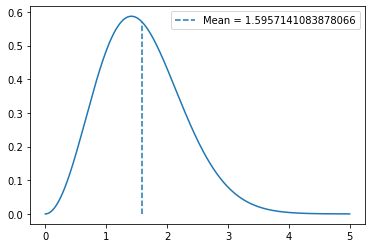

In [93]:
def f(x):
    return x**2*np.exp(-0.5*x**2)
def g(x):
    return f(x)/(np.sum(f(x)))/h

x = np.linspace(0,5,1000)
h = x[1]-x[0]
C = 1/np.sum(f(x))/h
mean = np.sum(x*g(x))*h

p.plot(x,g(x))
p.vlines(x = mean,ymin = 0, ymax = f(mean)*C, ls = '--', label = 'Mean = '+ str(mean))
p.legend()
p.show()

### Median

The median of a probability distribution is the value that divides the function in half, being that there is exactly as much quantity below the median value as there is above it. It can me calculated as 
$$\sum_{i = 0}^{m} f(x_i) =\frac{1}{2}$$
or
$$\int_{-\infty}^{m} f(x) d x=\frac{1}{2}$$

1.5415415415415414


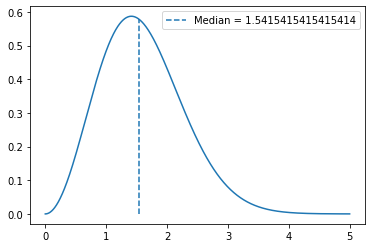

In [95]:
i = 0
sumi = 0
val = g(x)
while sumi < 0.5:
    sumi += val[i]*h
    i += 1
median = x[i]

p.plot(x,g(x))
p.vlines(x = median,ymin = 0, ymax = f(median)*C, ls = '--', label = 'Median = '+ str(median))
p.legend()
p.show()

### Mode

The mode is the value that appears most often. In a probability distribution, it's the value at which the function takes it's maximum value.

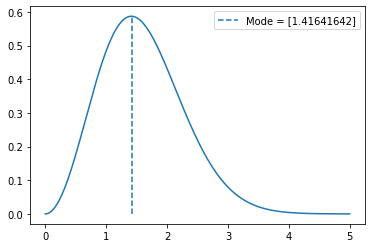

In [141]:
mode = x[np.where(g(x) == np.amax(g(x)))]

p.plot(x,g(x))
p.vlines(x = mode,ymin = 0, ymax = f(mode)*C, ls = '--', label = 'Mode = '+ str(mode))
p.legend()
p.show()

## Dispersion

### Variance and Standard Deviation

Variance is defined as 
$$\sigma^2=<x^2>-<x>^2$$
where the <> operation represents the mean of the quantity inside it.
Standard deviation is the square root of the variance.

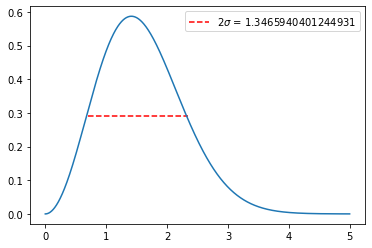

In [109]:
variance = np.sum(x**2*g(x))*h-(np.sum(x*g(x))*h)**2

p.plot(x,g(x))
p.hlines(y = 0.29, xmin = 0.7, xmax = 1 + 2*np.sqrt(variance), colors = 'r', ls = '--', label = r'2$\sigma$ = '+str(2*np.sqrt(variance)))
p.legend()
p.show()

### Range

The range is defined as the diference between the maximum value and the minimum value of a dataset 

### Quartiles

Quartiles divide the data in four equal sized sets. The first quartile is the value below which you can find 25% of the data, and the third quartile is the one above which you can find 25% of the data. The second quartile is the median. So they cam be defined in a similar way as such:
First Quartile:

$$\sum_{i = 0}^{q1} f(x_i) =\frac{1}{4}$$
or
$$\int_{-\infty}^{q1} f(x) d x=\frac{1}{4}$$

Third Quartile
$$\sum_{i = 0}^{q3} f(x_i) =\frac{3}{4}$$
or
$$\int_{-\infty}^{q3} f(x) d x=\frac{3}{4}$$

# Graphs

## Box

<AxesSubplot:>

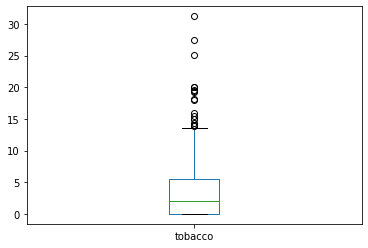

In [131]:
d = pd.read_csv('SAheart.csv')
d.drop('row.names', axis = 1, inplace = True)
d['tobacco'].plot.box()

## Histogram

<AxesSubplot:ylabel='Frequency'>

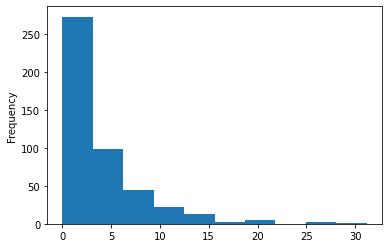

In [132]:
d['tobacco'].plot.hist()

## Pie

<AxesSubplot:ylabel='chd'>

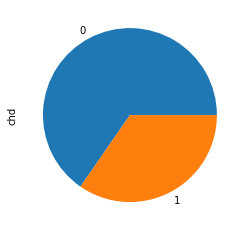

In [133]:
d['chd'].value_counts().plot.pie()

## Bars

<AxesSubplot:>

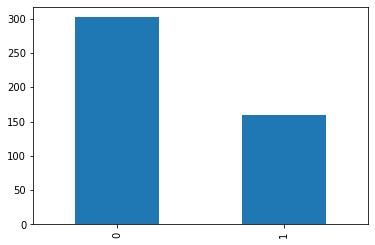

In [134]:
d['chd'].value_counts().plot.bar()

<AxesSubplot:ylabel='Density'>

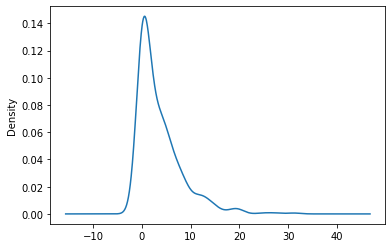

In [135]:
d['tobacco'].plot.density()

## Quantile plot

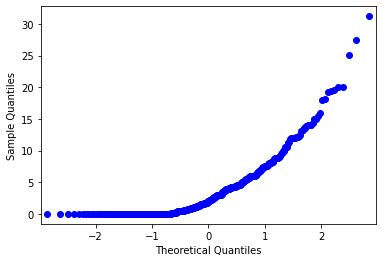

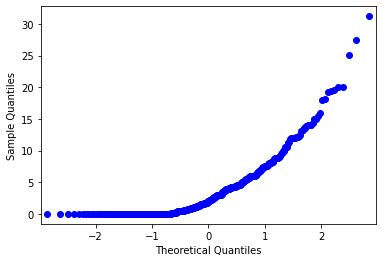

In [136]:
import statsmodels.api as sm
sm.qqplot(d['tobacco'])

# Multivariate Statistics

### Covariance

The covariance measures how two random cariables vary together. It is defined as 
$$\text{cov}(x,y) = <(x-\mu) (y-\nu)>$$
where $\mu$, $\nu$ are the mean values associated with the x and y variables.

### Correlation

Correlation measures any statistical relationship between two random variables:

$$\text{corr}(x,y) = \frac{\text{cov}(x,y)}{\sigma_x\sigma_y}$$

A correlation matrix cin a dataset can be obtained:

In [137]:
d.corr()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
sbp,1.000000,0.212247,0.158296,0.356500,-0.057454,0.238067,0.140096,0.388771,0.192354
tobacco,0.212247,1.000000,0.158905,0.286640,-0.014608,0.124529,0.200813,0.450330,0.299718
ldl,0.158296,0.158905,1.000000,0.440432,0.044048,0.330506,-0.033403,0.311799,0.263053
adiposity,0.356500,0.286640,0.440432,1.000000,-0.043144,0.716556,0.100330,0.625954,0.254121
typea,-0.057454,-0.014608,0.044048,-0.043144,1.000000,0.074006,0.039498,-0.102606,0.103156
obesity,0.238067,0.124529,0.330506,0.716556,0.074006,1.000000,0.051620,0.291777,0.100095
alcohol,0.140096,0.200813,-0.033403,0.100330,0.039498,0.051620,1.000000,0.101125,0.062531
age,0.388771,0.450330,0.311799,0.625954,-0.102606,0.291777,0.101125,1.000000,0.372973
chd,0.192354,0.299718,0.263053,0.254121,0.103156,0.100095,0.062531,0.372973,1.000000


### Scatter plot

<AxesSubplot:xlabel='age', ylabel='tobacco'>

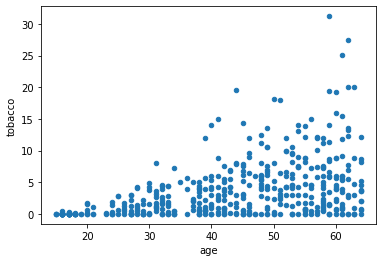

In [138]:
d.plot.scatter('age','tobacco')